# Importing packages

In [99]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Loading dataset and converting to dataframe

In [2]:
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['Price'] = boston.target
#Setting option to show all columns
pd.set_option('display.max_columns',500)

# Data exploration and cleaning (if any)

## Description of each feature

In [24]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Checking consistency in dataset

In [12]:
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

## Rows containing duplicate data

In [11]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows:', duplicate_rows_df.shape)

number of duplicate rows: (0, 14)


## Checking descriptive statistics of each feature

In [20]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Top 5 rows

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Bottom 5 rows

In [22]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


# EDA

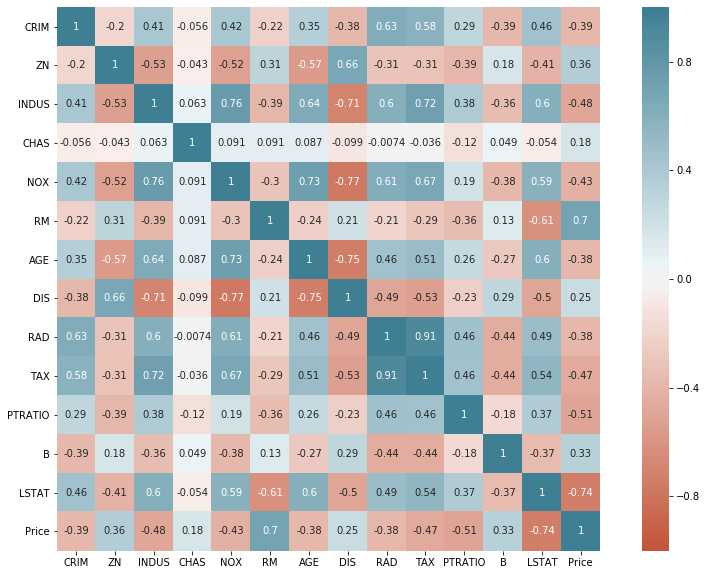

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'),vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square = True, annot=True)

# Modeling

## Base Model

### Splitting the dataset to feature and target datasets

In [34]:
X = df

In [36]:
X.drop('Price',axis=1, inplace=True)

In [43]:
y = pd.Series(boston.target,name='MEDV')

### Splitting to training and testing dataset

In [53]:
#Added constant column to the feature dataset because Statsmodel does not add by its own
X_constant = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_constant, y, test_size=0.25, random_state=42)

### Fitting OLS using Statsmodel

In [54]:
lin_reg = sm.OLS(y_train,X_train)
lin_reg_train = lin_reg.fit()
lin_reg_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     83.38
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          1.15e-100
Time:                        21:29:07   Log-Likelihood:                -1126.4
No. Observations:                 379   AIC:                             2281.
Df Residuals:                     365   BIC:                             2336.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8364      5.861      5.090      0.000      18.310      41.363
CRIM          -0.1283      0.039     -3.262      0.001      -0.206      -0.051
ZN             0.0296      0.017      1.772      0.077      -0.003       0.062
INDUS          0.0489      0.069      0.706      0.481      -0.087       0.185
CHAS           2.7735      0.974      2.848      0.005       0.859       4.688
NOX          -16.2388      4.432     -3.664      0.000     -24.955      -7.523
RM             4.3688      0.481      9.091      0.000       3.424       5.314
AGE           -0.0092      0.015     -0.599      0.550      -0.040       0.021
DIS           -1.4009      0.237     -5.915      0.000      -1.867      -0.935
RAD            0.2578      0.079      3.279      0.001       0.103       0.412
TAX           -0.0100      0.004     -2.277      0.023      -0.019      -0.001
PTRATIO       -0.9231      0.150     -6.164      0.000      -1.218      -0.629
B              0.0132      0.003      4.143      0.000       0.007       0.019
LSTAT         -0.5176      0.058     -8.995      0.000      -0.631      -0.404
==============================================================================
Omnibus:                      125.754   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.968
Skew:                           1.392   Prob(JB):                    8.30e-116
Kurtosis:                       8.081   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Comparing fit with Sklearn's LinearRegression() 

In [72]:
sk_lin_reg = LinearRegression()

In [73]:
sk_lin_reg_train = sk_lin_reg.fit(X_train,y_train)

In [86]:
params = pd.Series(sk_lin_reg_train.coef_, index= X_train.columns)
params

const       0.000000
CRIM       -0.128323
ZN          0.029552
INDUS       0.048859
CHAS        2.773503
NOX       -16.238829
RM          4.368755
AGE        -0.009248
DIS        -1.400867
RAD         0.257761
TAX        -0.009957
PTRATIO    -0.923123
B           0.013185
LSTAT      -0.517640
dtype: float64

In [76]:
sk_lin_reg_train.score(X_train,y_train)

0.748087259862344

In [77]:
sk_lin_reg_train.intercept_

29.836420163839122

In [78]:
sk_y_pred = sk_lin_reg_train.predict(X_test)

In [79]:
print(np.sqrt(metrics.mean_squared_error(y_test, sk_y_pred)))

4.700924890603756


### Model validation: Predicting on unseen data - Test data (Holdout set)

In [55]:
y_pred = lin_reg_train.predict(X_test)

In [56]:
print(y_test,y_pred)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
418     8.8
117    19.2
42     25.3
322    20.4
347    23.1
Name: MEDV, Length: 127, dtype: float64 173    28.838854
274    36.007833
491    15.083248
72     25.230909
452    18.878641
         ...    
418     3.284209
117    23.798796
42     25.733299
322    23.048156
347    24.730468
Length: 127, dtype: float64


### Evaluating prediction accuracy

In [61]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.7009248906037495


### Comparing model performance with average value model performance

In [67]:
y_mean = [y.mean()]*127

In [68]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_mean)))

8.442762930708769


### Final thoughts and next steps

### Model validation 2:  Cross-validation

In [81]:
score = cross_val_score(sk_lin_reg, X_train, y_train, cv=5)

In [82]:
score.mean()

0.7155138299376531

In [88]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
clf.score(X_train,y_train)

0.7461161787884156

In [90]:
score2 = cross_val_score(clf, X_train, y_train, cv=5)

In [91]:
score2.mean()

0.7122364944120346

In [92]:
y_pred_ridge = clf.predict(X_test)

In [93]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

4.741357980709097


In [95]:
clf_la = Lasso(alpha=0.1)
clf_la.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
clf_la.score(X_train,y_train)

0.7368608115180646

In [97]:
y_pred_lasso = clf_la.predict(X_test)

In [98]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

4.835895380271983


## Model after Standardizing dataset

In [100]:
# Standardising because each predictor is a different unit. So we need to have all predictors on same scale to compare..
#..one predictor to other
scaler = StandardScaler()

In [102]:
X_std = scaler.fit_transform(X,y)

In [107]:
X_std

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [108]:
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y, test_size=0.25, random_state=42)

### Sklearn

In [118]:
sk_lin_reg_std = LinearRegression(normalize=False)

In [119]:
sk_lin_reg_std_train = sk_lin_reg_std.fit(X_std_train,y_std_train)

In [120]:
params = pd.Series(sk_lin_reg_std_train.coef_, index= X.columns)
params

CRIM      -1.102682
ZN         0.688539
INDUS      0.334859
CHAS       0.703757
NOX       -1.879857
RM         3.066527
AGE       -0.260066
DIS       -2.946903
RAD        2.242175
TAX       -1.676456
PTRATIO   -1.996535
B          1.202571
LSTAT     -3.692841
dtype: float64

In [121]:
sk_lin_reg_std_train.score(X_std_train,y_std_train)

0.748087259862344

In [122]:
sk_lin_reg_std_train.intercept_

22.455523585661055

In [123]:
sk_y_std_pred = sk_lin_reg_std_train.predict(X_std_test)

In [124]:
print(np.sqrt(metrics.mean_squared_error(y_std_test, sk_y_std_pred)))

4.700924890603751


### Statsmodel

In [159]:
boston = load_boston()

In [160]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['Price'] = boston.target
#Setting option to show all columns
pd.set_option('display.max_columns',500)

In [161]:
X = df

In [162]:
X.drop('Price',axis=1, inplace=True)

In [163]:
y = pd.Series(boston.target,name='MEDV')

In [155]:
X = sm.add_constant(X)

/Users/himanshuagarwal/anaconda3/envs/mentproject/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [164]:
Xstd = scaler.fit_transform(X,y)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(Xstd, y, test_size=0.25, random_state=42)

In [166]:
linstat = sm.OLS(y_train,X_train)
linstatreg = linstat.fit()
linstatreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.151
Model:                            OLS   Adj. R-squared (uncentered):              0.121
Method:                 Least Squares   F-statistic:                              5.020
Date:                Thu, 10 Oct 2019   Prob (F-statistic):                    3.57e-08
Time:                        20:17:58   Log-Likelihood:                         -1723.1
No. Observations:                 379   AIC:                                      3472.
Df Residuals:                     366   BIC:                                      3523.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1739      1.630     -0.720      0.472      -4.378       2.031
x2             0.5781      1.873      0.309      0.758      -3.105       4.261
x3             0.3994      2.288      0.175      0.862      -4.100       4.899
x4             0.8253      1.191      0.693      0.489      -1.517       3.168
x5            -0.6493      2.473     -0.263      0.793      -5.512       4.213
x6             4.2042      1.625      2.587      0.010       1.009       7.400
x7             0.1905      2.093      0.091      0.928      -3.925       4.306
x8            -2.5315      2.402     -1.054      0.293      -7.255       2.192
x9             1.9422      3.297      0.589      0.556      -4.541       8.425
x10           -1.3872      3.549     -0.391      0.696      -8.366       5.591
x11           -3.6379      1.559     -2.334      0.020      -6.703      -0.572
x12            1.8991      1.399      1.358      0.175      -0.852       4.650
x13           -3.4123      1.979     -1.724      0.086      -7.304       0.480
==============================================================================
Omnibus:                       93.994   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.159
Skew:                           0.997   Prob(JB):                     1.42e-89
Kurtosis:                       7.683   Cond. No.                         9.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
y_pred = linstatreg.predict(X_test)

In [169]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

24.150670666751235
